In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

folder_path = r'C:\Users\techu\Desktop\monte\offsetVoltage'

def find_files_with_keyword(folder_path, keyword):
    file_list = []
    for file_name in os.listdir(folder_path):
        if keyword in file_name:
            file_list.append(file_name)
    return file_list

# Find files for each device type
CScompdata_files = find_files_with_keyword(folder_path, 'CS')
AlternaitveLewisData_files = find_files_with_keyword(folder_path, 'ALT')
LewisGreyData_files = [file for file in os.listdir(folder_path) if file not in CScompdata_files and file not in AlternaitveLewisData_files]

# Make dataframe for each file in each device type
def load_data(files, folder_path):
    data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(os.path.join(folder_path, file), sep='\t', header=None)
        data = pd.concat([data, df], axis=1)
    return data

CScompdata = load_data(CScompdata_files, folder_path)
LewisGreyData = load_data(LewisGreyData_files, folder_path)
AlternaitveLewisData = load_data(AlternaitveLewisData_files, folder_path)

# Assuming all dataframes should have the same columns
columns = ['1V', '400mV', '500mV', '600mV', '700mV', '800mV', '900mV']
CScompdata.columns = columns
LewisGreyData.columns = columns
AlternaitveLewisData.columns = columns

AlternaitveLewisData=AlternaitveLewisData[1:]
LewisGreyData=LewisGreyData[1:]
CScompdata=CScompdata[1:]

#remove the comma and the number after it 
AlternaitveLewisData = AlternaitveLewisData.replace(',.*', '', regex=True)
LewisGreyData = LewisGreyData.replace(',.*', '', regex=True)
CScompdata = CScompdata.replace(',.*', '', regex=True)

#convert to float
AlternaitveLewisData = AlternaitveLewisData.astype(float)
LewisGreyData = LewisGreyData.astype(float)
CScompdata = CScompdata.astype(float)

#calculateing the mean and standard deviation

CScompdata_mean = CScompdata.mean()
CScompdata_std = CScompdata.std()

LewisGreyData_mean = LewisGreyData.mean()
LewisGreyData_std = LewisGreyData.std()

AlternaitveLewisData_mean = AlternaitveLewisData.mean()
AlternaitveLewisData_std = AlternaitveLewisData.std()

#Converting the mean to mili and the std to mili 

CScompdata_mean = CScompdata_mean
CScompdata_std = CScompdata_std

LewisGreyData_mean = LewisGreyData_mean
LewisGreyData_std = LewisGreyData_std

AlternaitveLewisData_mean = AlternaitveLewisData_mean
AlternaitveLewisData_std = AlternaitveLewisData_std

#making a dataframe for the mean and std
CScompdata_mean = pd.DataFrame(CScompdata_mean)
CScompdata_std = pd.DataFrame(CScompdata_std)

LewisGreyData_mean = pd.DataFrame(LewisGreyData_mean)
LewisGreyData_std = pd.DataFrame(LewisGreyData_std)

AlternaitveLewisData_mean = pd.DataFrame(AlternaitveLewisData_mean)
AlternaitveLewisData_std = pd.DataFrame(AlternaitveLewisData_std)


#making histogram for the data of each column in each device type and printing the mean and std in the legend 

# Function to plot histograms for each dataset with scaled mean and std
def plot_histograms(data, data_mean, data_std, title_prefix, color):
    for column in columns:
        plt.figure()
        # Extract scalar value from Series for mean and std
        scaled_mean = (data_mean.loc[column] * 1000).values[0]
        scaled_std = (data_std.loc[column] * 1000).values[0]
        # Use scalar values for formatting
        sns.histplot(data[column], kde=True, color=color, label=f'{column} mean: {scaled_mean:.2f}m, std: {scaled_std:.2f}m')
        plt.legend()
        plt.title(f'{title_prefix} {column}')
        plt.xlabel('Voltage Level')
        plt.ylabel('Frequency')
        plt.show()

# Plotting histograms for each dataset with scaled mean and std


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science', 'ieee'])

# Converting voltage strings to numerical values
def convert_voltage_to_numeric(voltage_str):
    if voltage_str.endswith('V') and not voltage_str.endswith('mV'):
        return float(voltage_str.rstrip('V'))
    elif voltage_str.endswith('mV'):
        return float(voltage_str.rstrip('mV')) / 1000
    else:
        raise ValueError("Unknown voltage unit")

# Original columns array with voltage points as strings
columns = ['1V', '400mV', '500mV', '600mV', '700mV', '800mV', '900mV']
numeric_columns = np.array([convert_voltage_to_numeric(v) for v in columns])

def plot_std_with_lines(CScompdata_std, LewisGreyData_std, AlternaitveLewisData_std, title):
    sorted_indices = np.argsort(numeric_columns)
    sorted_columns = numeric_columns[sorted_indices]

    with plt.style.context(['science', 'ieee']):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

        ax1.plot(sorted_columns, CScompdata_std.values.flatten()[sorted_indices] * 1000, '-o', label='CScompdata')
        ax1.plot(sorted_columns, AlternaitveLewisData_std.values.flatten()[sorted_indices] * 1000, '-o', linestyle=':', label='Alternative Lewis Data')
        ax1.set_ylabel('Standard Deviation (mV)', fontsize=10)
        ax1.legend(fontsize=8)
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax1.minorticks_on()

        ax2.plot(sorted_columns, LewisGreyData_std.values.flatten()[sorted_indices] * 1000, '-o', label='LewisGreyData', color='r')
        ax2.set_ylabel('Standard Deviation (mV)', fontsize=10)
        ax2.legend(fontsize=8)
        ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax2.minorticks_on()

        fig.text(0.5, 0.04, 'Common Mode Voltage (V)', ha='center', fontsize=10)
        plt.suptitle(title, fontsize=12)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout(rect=[0, 0.04, 1, 1])
        plt.savefig('std_comparison.png')
        plt.show()

def plot_mean_with_lines(CScompdata_mean, LewisGreyData_mean, AlternaitveLewisData_mean, title):
    sorted_indices = np.argsort(numeric_columns)
    sorted_columns = numeric_columns[sorted_indices]

    with plt.style.context(['science', 'ieee']):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

        ax1.plot(sorted_columns, CScompdata_mean.values.flatten()[sorted_indices] * 1000, '-o', label='CScompdata')
        ax1.plot(sorted_columns, AlternaitveLewisData_mean.values.flatten()[sorted_indices] * 1000, '-o', linestyle=':', label='Alternative Lewis Data')
        ax1.set_ylabel('Mean (mV)', fontsize=10)
        ax1.legend(fontsize=8)
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax1.minorticks_on()

        ax2.plot(sorted_columns, LewisGreyData_mean.values.flatten()[sorted_indices] * 1000, '-o', label='LewisGreyData', color='r')
        ax2.set_ylabel('Mean (mV)', fontsize=10)
        ax2.legend(fontsize=8)
        ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax2.minorticks_on()

        fig.text(0.5, 0.04, 'Common Mode Voltage (V)', ha='center', fontsize=10)
        plt.suptitle(title, fontsize=12)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout(rect=[0, 0.04, 1, 1])
        plt.savefig('mean_comparison.png')
        plt.show()

# Assuming CScompdata_std, LewisGreyData_std, AlternaitveLewisData_std, CScompdata_mean, LewisGreyData_mean, and AlternaitveLewisData_mean are defined
# Plotting standard deviations with lines
plot_std_with_lines(CScompdata_std, LewisGreyData_std, AlternaitveLewisData_std, 'Standard Deviation vs. Common Mode Voltage')

# Plotting means with lines
plot_mean_with_lines(CScompdata_mean, LewisGreyData_mean, AlternaitveLewisData_mean, 'Mean vs. Common Mode Voltage')


ModuleNotFoundError: No module named 'scienceplots'

In [6]:

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots

sns.set(style="darkgrid")
plt.style.use(['science', 'ieee'])

folder_path = r'C:\Users\techu\Desktop\monte\offsetVoltage'

def find_files_with_keyword(folder_path, keyword):
    file_list = []
    for file_name in os.listdir(folder_path):
        if keyword in file_name:
            file_list.append(file_name)
    return file_list

# Find files for each device type
CScompdata_files = find_files_with_keyword(folder_path, 'CS')
AlternaitveLewisData_files = find_files_with_keyword(folder_path, 'ALT')
LewisGreyData_files = [file for file in os.listdir(folder_path) if file not in CScompdata_files and file not in AlternaitveLewisData_files]

# Make dataframe for each file in each device type
def load_data(files, folder_path):
    data = pd.DataFrame()
    for file in files:
        df = pd.read_csv(os.path.join(folder_path, file), sep='\t', header=None)
        data = pd.concat([data, df], axis=1)
    return data

CScompdata = load_data(CScompdata_files, folder_path)
LewisGreyData = load_data(LewisGreyData_files, folder_path)
AlternaitveLewisData = load_data(AlternaitveLewisData_files, folder_path)

# Assuming all dataframes should have the same columns
columns = ['1V', '400mV', '500mV', '600mV', '700mV', '800mV', '900mV']
CScompdata.columns = columns
LewisGreyData.columns = columns
AlternaitveLewisData.columns = columns

AlternaitveLewisData=AlternaitveLewisData[1:]
LewisGreyData=LewisGreyData[1:]
CScompdata=CScompdata[1:]

# Remove the comma and the number after it
AlternaitveLewisData = AlternaitveLewisData.replace(',.*', '', regex=True)
LewisGreyData = LewisGreyData.replace(',.*', '', regex=True)
CScompdata = CScompdata.replace(',.*', '', regex=True)

# Convert to float
AlternaitveLewisData = AlternaitveLewisData.astype(float)
LewisGreyData = LewisGreyData.astype(float)
CScompdata = CScompdata.astype(float)

# Calculate the mean and standard deviation
CScompdata_mean = CScompdata.mean()
CScompdata_std = CScompdata.std()

LewisGreyData_mean = LewisGreyData.mean()
LewisGreyData_std = LewisGreyData.std()

AlternaitveLewisData_mean = AlternaitveLewisData.mean()
AlternaitveLewisData_std = AlternaitveLewisData.std()

# Convert the mean and std to millivolts (if needed, depending on your data)
CScompdata_mean = CScompdata_mean
CScompdata_std = CScompdata_std

LewisGreyData_mean = LewisGreyData_mean
LewisGreyData_std = LewisGreyData_std

AlternaitveLewisData_mean = AlternaitveLewisData_mean
AlternaitveLewisData_std = AlternaitveLewisData_std

# Create dataframes for the mean and std
CScompdata_mean = pd.DataFrame(CScompdata_mean)
CScompdata_std = pd.DataFrame(CScompdata_std)

LewisGreyData_mean = pd.DataFrame(LewisGreyData_mean)
LewisGreyData_std = pd.DataFrame(LewisGreyData_std)

AlternaitveLewisData_mean = pd.DataFrame(AlternaitveLewisData_mean)
AlternaitveLewisData_std = pd.DataFrame(AlternaitveLewisData_std)

# Function to plot histograms for each dataset with scaled mean and std
def plot_histograms(data, data_mean, data_std, title_prefix, color, filename):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    axs = axs.flatten()
    
    for i, column in enumerate(columns):
        if i < len(axs):
            # Extract scalar value from Series for mean and std
            scaled_mean = (data_mean.loc[column] * 1000).values[0]
            scaled_std = (data_std.loc[column] * 1000).values[0]
            # Use scalar values for formatting
            sns.histplot(data[column], kde=True, color=color, ax=axs[i])
            axs[i].set_title(f'{column} mean: {scaled_mean:.2f}mV, std: {scaled_std:.2f}mV', fontsize=10)
            axs[i].set_xlabel('Voltage Level (mV)', fontsize=8)
            axs[i].set_ylabel('Frequency', fontsize=8)
            axs[i].tick_params(axis='both', which='major', labelsize=8)
    
    plt.suptitle(f'{title_prefix}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(filename)
    plt.show()

# Plotting histograms for each dataset with scaled mean and std
plot_histograms(CScompdata, CScompdata_mean, CScompdata_std, 'CScompdata', 'blue', 'CScompdata_histograms.png')
plot_histograms(LewisGreyData, LewisGreyData_mean, LewisGreyData_std, 'LewisGreyData', 'red', 'LewisGreyData_histograms.png')
plot_histograms(AlternaitveLewisData, AlternaitveLewisData_mean, AlternaitveLewisData_std, 'AlternaitveLewisData', 'green', 'AlternaitveLewisData_histograms.png')



KeyboardInterrupt: 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_dict = { 'CScompdata': CScompdata, 'LewisGreyData': LewisGreyData, 'AlternaitveLewisData': AlternaitveLewisData }


# Adjusted function for custom subplot arrangement
def plot_custom_layout_histograms(data_dict, columns, figsize=(15, 12)):
    # Sort columns to ensure the order from 400mV to 1V
    sorted_columns = sorted(columns, key=lambda x: float(x.rstrip('mV').rstrip('V')) if 'mV' in x else float(x.rstrip('V'))*1000)
    
    # Create a figure
    fig = plt.figure(figsize=figsize)
    
    # Define grid layout: 2 rows, 2 columns
    # Create subplots in specified positions
    axes = [
        plt.subplot2grid((2, 2), (0, 0)),
        plt.subplot2grid((2, 2), (1, 0), colspan=2),  # Bottom-middle  # Top-left
        plt.subplot2grid((2, 2), (0, 1))  # Top-right
    ]
    
    # Iterate over the devices and their corresponding axes
    for ax, (title, data) in zip(axes, data_dict.items()):
        for column in sorted_columns:
            # Convert data to millivolts
            data_mV = data[column] * 1000
            mean_mV = data_mV.mean()
            std_mV = data_mV.std()
            # Adjust alpha for 1V and 800mV data
            if column == '1V':
                alpha_value = 0.5
            elif column == '800mV':
                alpha_value = 0.75  # Slightly more transparent for 800mV
            else:
                alpha_value = 1
            # Plot histogram with adjusted transparency
            sns.histplot(data_mV, kde=False, ax=ax, alpha=alpha_value, label=f'{column}: mean={mean_mV:.2f}mV, std={std_mV:.2f}mV')
        ax.set_title(title)
        ax.set_xlabel('Voltage Level (mV)')
        ax.legend(title='Common Mode Voltage')
    
    # Set common labels for the leftmost plots only
    axes[0].set_ylabel('Frequency')
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Assuming data_dict and columns are defined as in the previous code snippet
plot_custom_layout_histograms(data_dict, columns)

# Spectrum Reconstruction

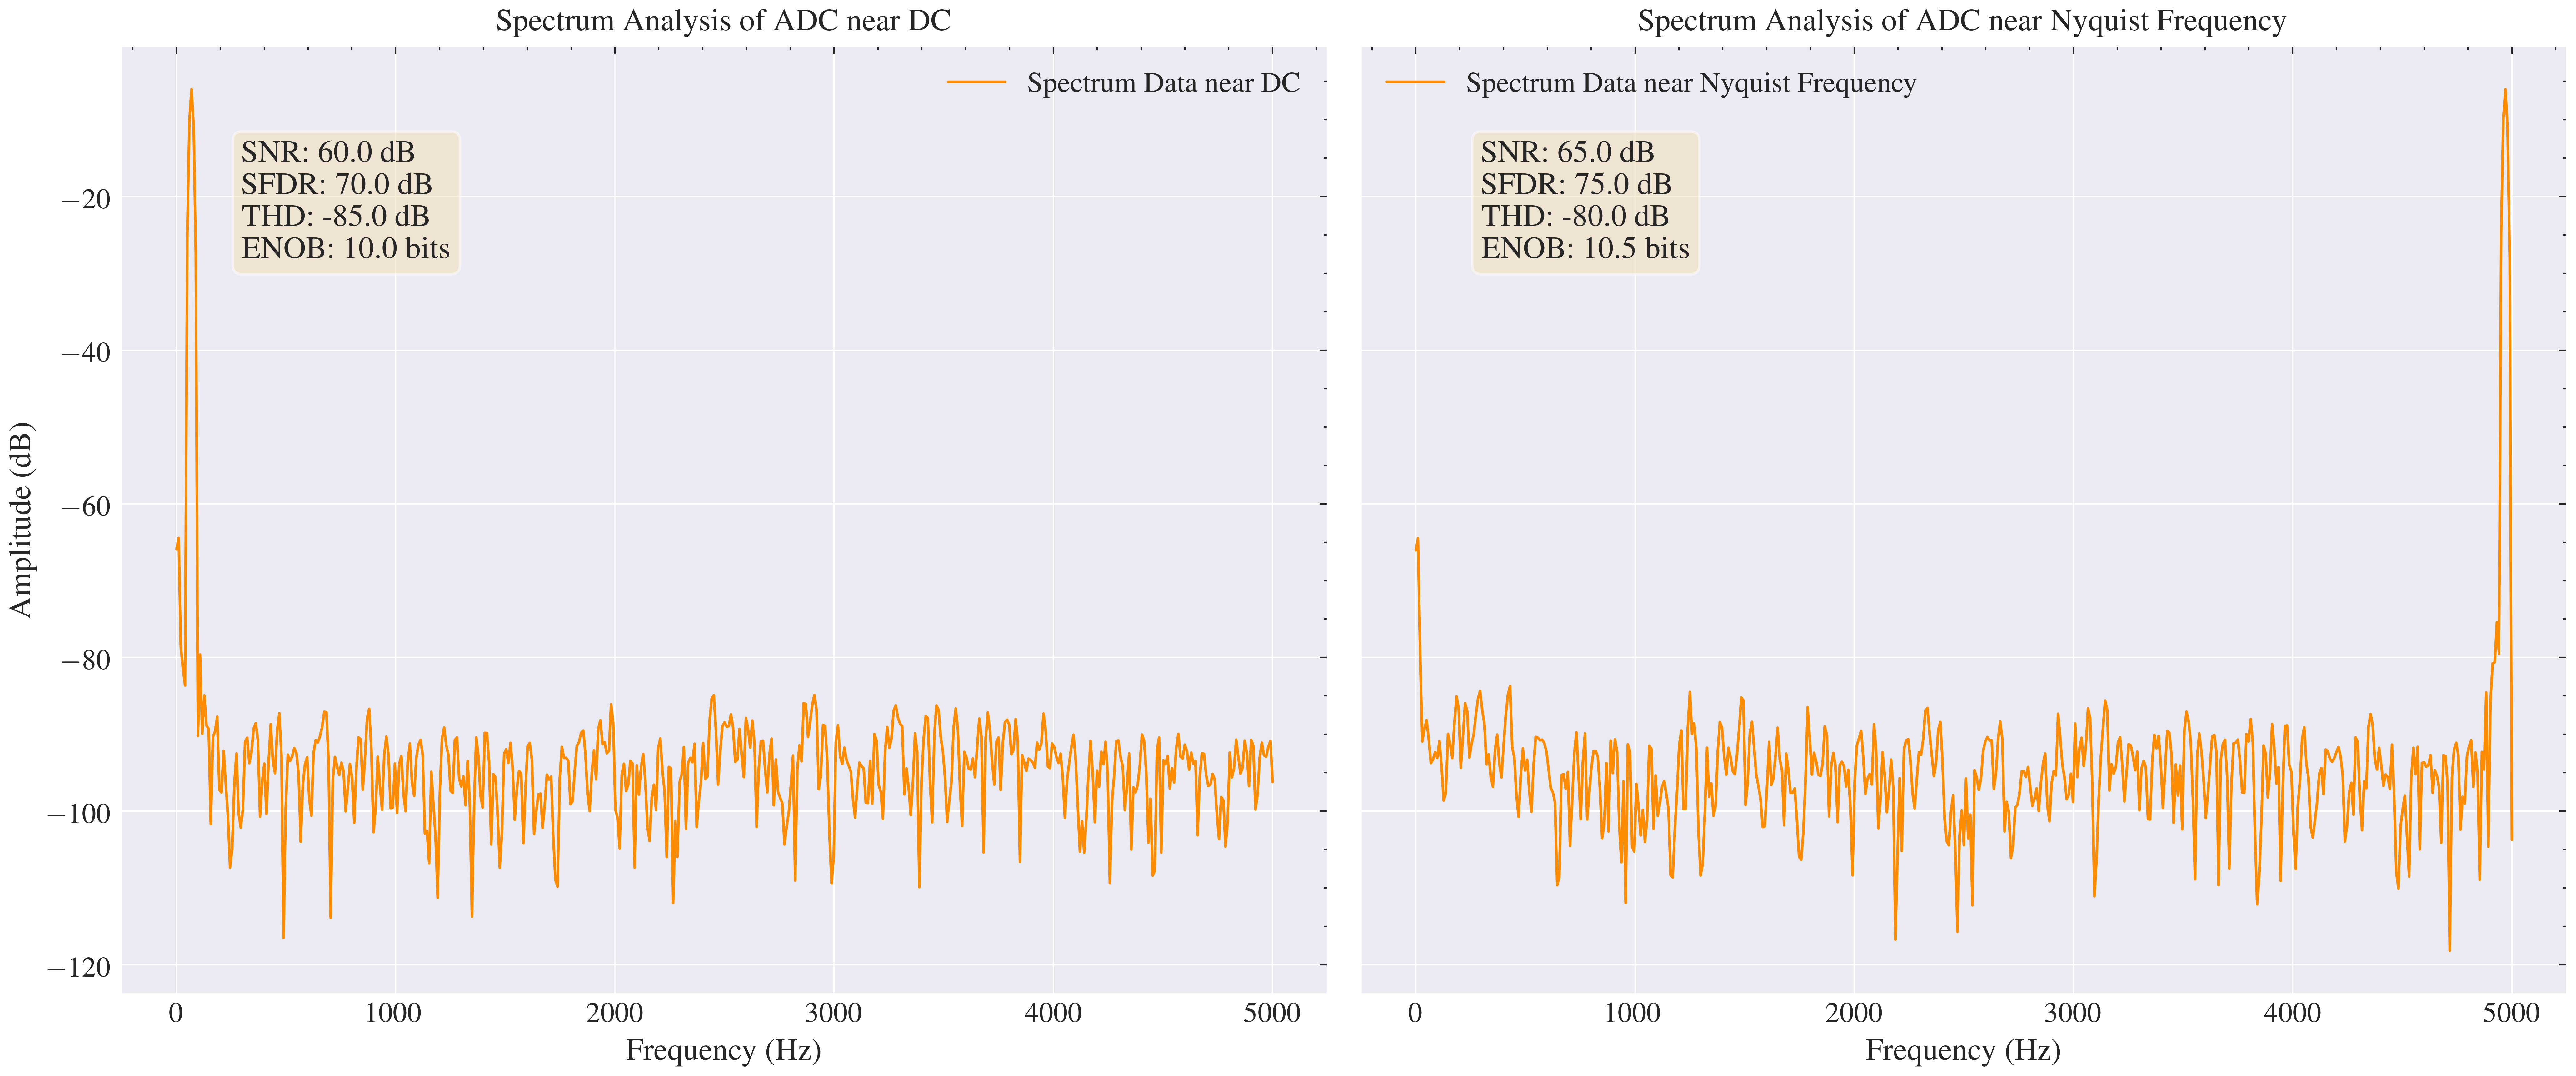

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure scienceplots is installed: pip install scienceplots
plt.style.use('science')

# Example values for SNR, SFDR, THD, and ENOB
snr_1 = 65.0
sfdr_1 = 75.0
thd_1 = -80.0
enob_1 = 10.5

snr_2 = 60.0
sfdr_2 = 70.0
thd_2 = -85.0
enob_2 = 10.0

# Read data from the second CSV file (DC data)
data_2 = pd.read_csv('SpectrumLewisALTNDC.csv')

# Extracting X and Y values from the second dataset
x_2 = data_2['spectrum_/Vout (vss=0) X']
y_2 = data_2['spectrum_/Vout (vss=0) Y']

# Read data from the first CSV file (Nyquist frequency data)
data_1 = pd.read_csv('SpectrumLewisALTNNQ.csv')

# Extracting X and Y values from the first dataset
x_1 = data_1['spectrum_/Vout (vss=0) X']
y_1 = data_1['spectrum_/Vout (vss=0) Y']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the second dataset (DC data) on the left
axs[0].plot(x_2, y_2, label='Spectrum Data near DC', color='darkorange')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude (dB)')
axs[0].set_title('Spectrum Analysis of ADC near DC')
axs[0].legend()
axs[0].grid(True)

# Adding text box to the first subplot (DC data)
textstr_2 = '\n'.join((
    f'SNR: {snr_2} dB',
    f'SFDR: {sfdr_2} dB',
    f'THD: {thd_2} dB',
    f'ENOB: {enob_2} bits'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs[0].text(0.1, 0.90, textstr_2, transform=axs[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

# Plotting the first dataset (Nyquist frequency data) on the right
axs[1].plot(x_1, y_1, label='Spectrum Data near Nyquist Frequency', color='darkorange')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_title('Spectrum Analysis of ADC near Nyquist Frequency')
axs[1].legend()
axs[1].grid(True)

# Adding text box to the second subplot (Nyquist frequency data)
textstr_1 = '\n'.join((
    f'SNR: {snr_1} dB',
    f'SFDR: {sfdr_1} dB',
    f'THD: {thd_1} dB',
    f'ENOB: {enob_1} bits'))
axs[1].text(0.1, 0.90, textstr_1, transform=axs[1].transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()


'valgplakat.png'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming CScompdata, LewisGreyData, and AlternaitveLewisData are defined and columns list is provided
data_dict = {'CScompdata': CScompdata, 'LewisGreyData': LewisGreyData, 'AlternaitveLewisData': AlternaitveLewisData}

# Adjusted function for custom subplot arrangement
def plot_custom_layout_histograms(data_dict, columns, figsize=(18, 12), output_filename="histograms.pdf", custom_titles=None):
    # Set font sizes for better readability
    plt.rcParams.update({'font.size': 18, 'axes.titlesize': 20, 'axes.labelsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'legend.fontsize': 18, 'legend.title_fontsize': 18})
    
    # Sort columns to ensure the order from 400mV to 1V
    sorted_columns = sorted(columns, key=lambda x: float(x.rstrip('mV').rstrip('V')) if 'mV' in x else float(x.rstrip('V')) * 1000)
    
    # Create a figure
    fig = plt.figure(figsize=figsize)
    
    # Define grid layout: 2 rows, 2 columns
    # Create subplots in specified positions
    axes = [
        plt.subplot2grid((2, 2), (0, 0)),
        plt.subplot2grid((2, 2), (1, 0), colspan=2),  # Bottom-middle  # Top-left
        plt.subplot2grid((2, 2), (0, 1))  # Top-right
    ]
    
    # Iterate over the devices and their corresponding axes
    for i, (ax, (title, data)) in enumerate(zip(axes, data_dict.items())):
        for column in sorted_columns:
            # Convert data to millivolts
            data_mV = data[column] * 1000
            # Adjust alpha for 1V and 800mV data
            if column == '1V':
                alpha_value = 0.5
            elif column == '800mV':
                alpha_value = 0.75  # Slightly more transparent for 800mV
            else:
                alpha_value = 1
            # Plot histogram with adjusted transparency
            sns.histplot(data_mV, kde=False, ax=ax, alpha=alpha_value, label=f'{column}')
        # Set custom title if provided, otherwise use the default title
        custom_title = custom_titles[i] if custom_titles and i < len(custom_titles) else title
        ax.set_title(custom_title)
        ax.set_xlabel('Voltage Level (mV)')
        ax.set_ylabel('Frequency')  # Ensure y-axis label is set to 'Frequency'
        ax.legend(title='Common Mode Voltage')
    
    plt.tight_layout()
    plt.savefig('histograms2.pdf', format='pdf', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Assuming data_dict and columns are defined as in the previous code snippet
custom_titles = ["CS Comp",  "Lewis Grey Comp","Diff pair Comp"]
plot_custom_layout_histograms(data_dict, columns, custom_titles=custom_titles)
#save foigirte as pdf



C:\Users\techu\AppData\Local\Temp\ipykernel_13300\1848818386.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(sorted_columns, AlternaitveLewisData_std.values.flatten()[sorted_indices] * 1000, '-o', linestyle=':', label='Diff Pair Comp')


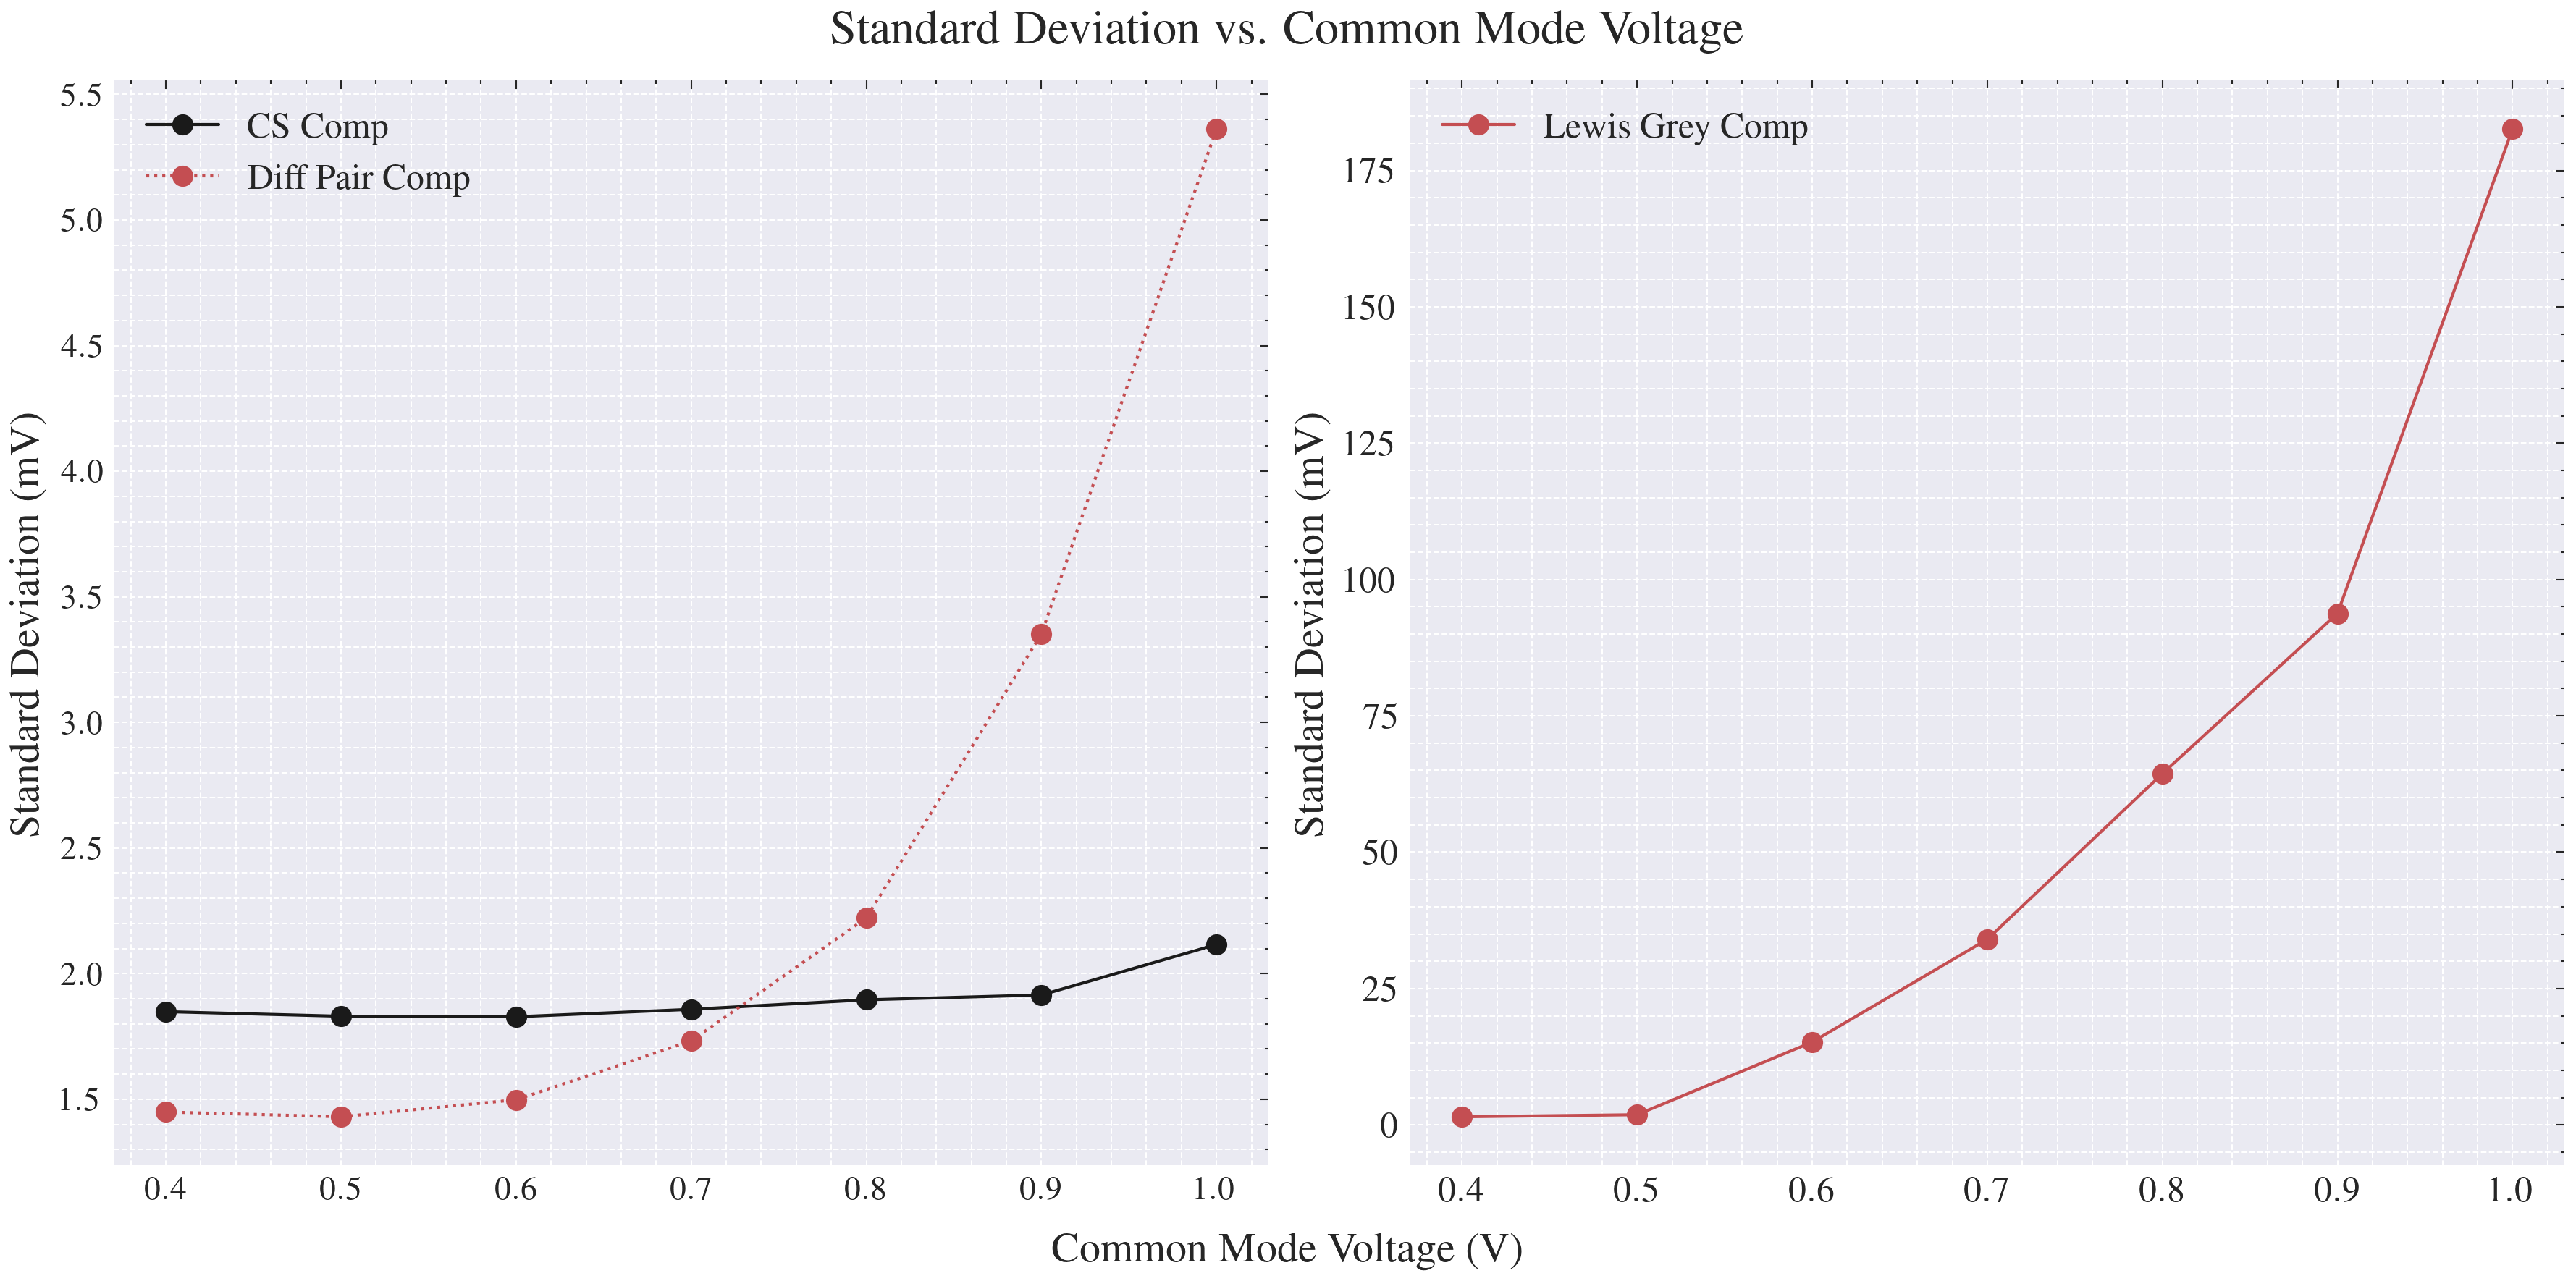

C:\Users\techu\AppData\Local\Temp\ipykernel_13300\1848818386.py:56: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(sorted_columns, AlternaitveLewisData_mean.values.flatten()[sorted_indices] * 1000, '-o', linestyle=':', label='Diff Pair Comp')


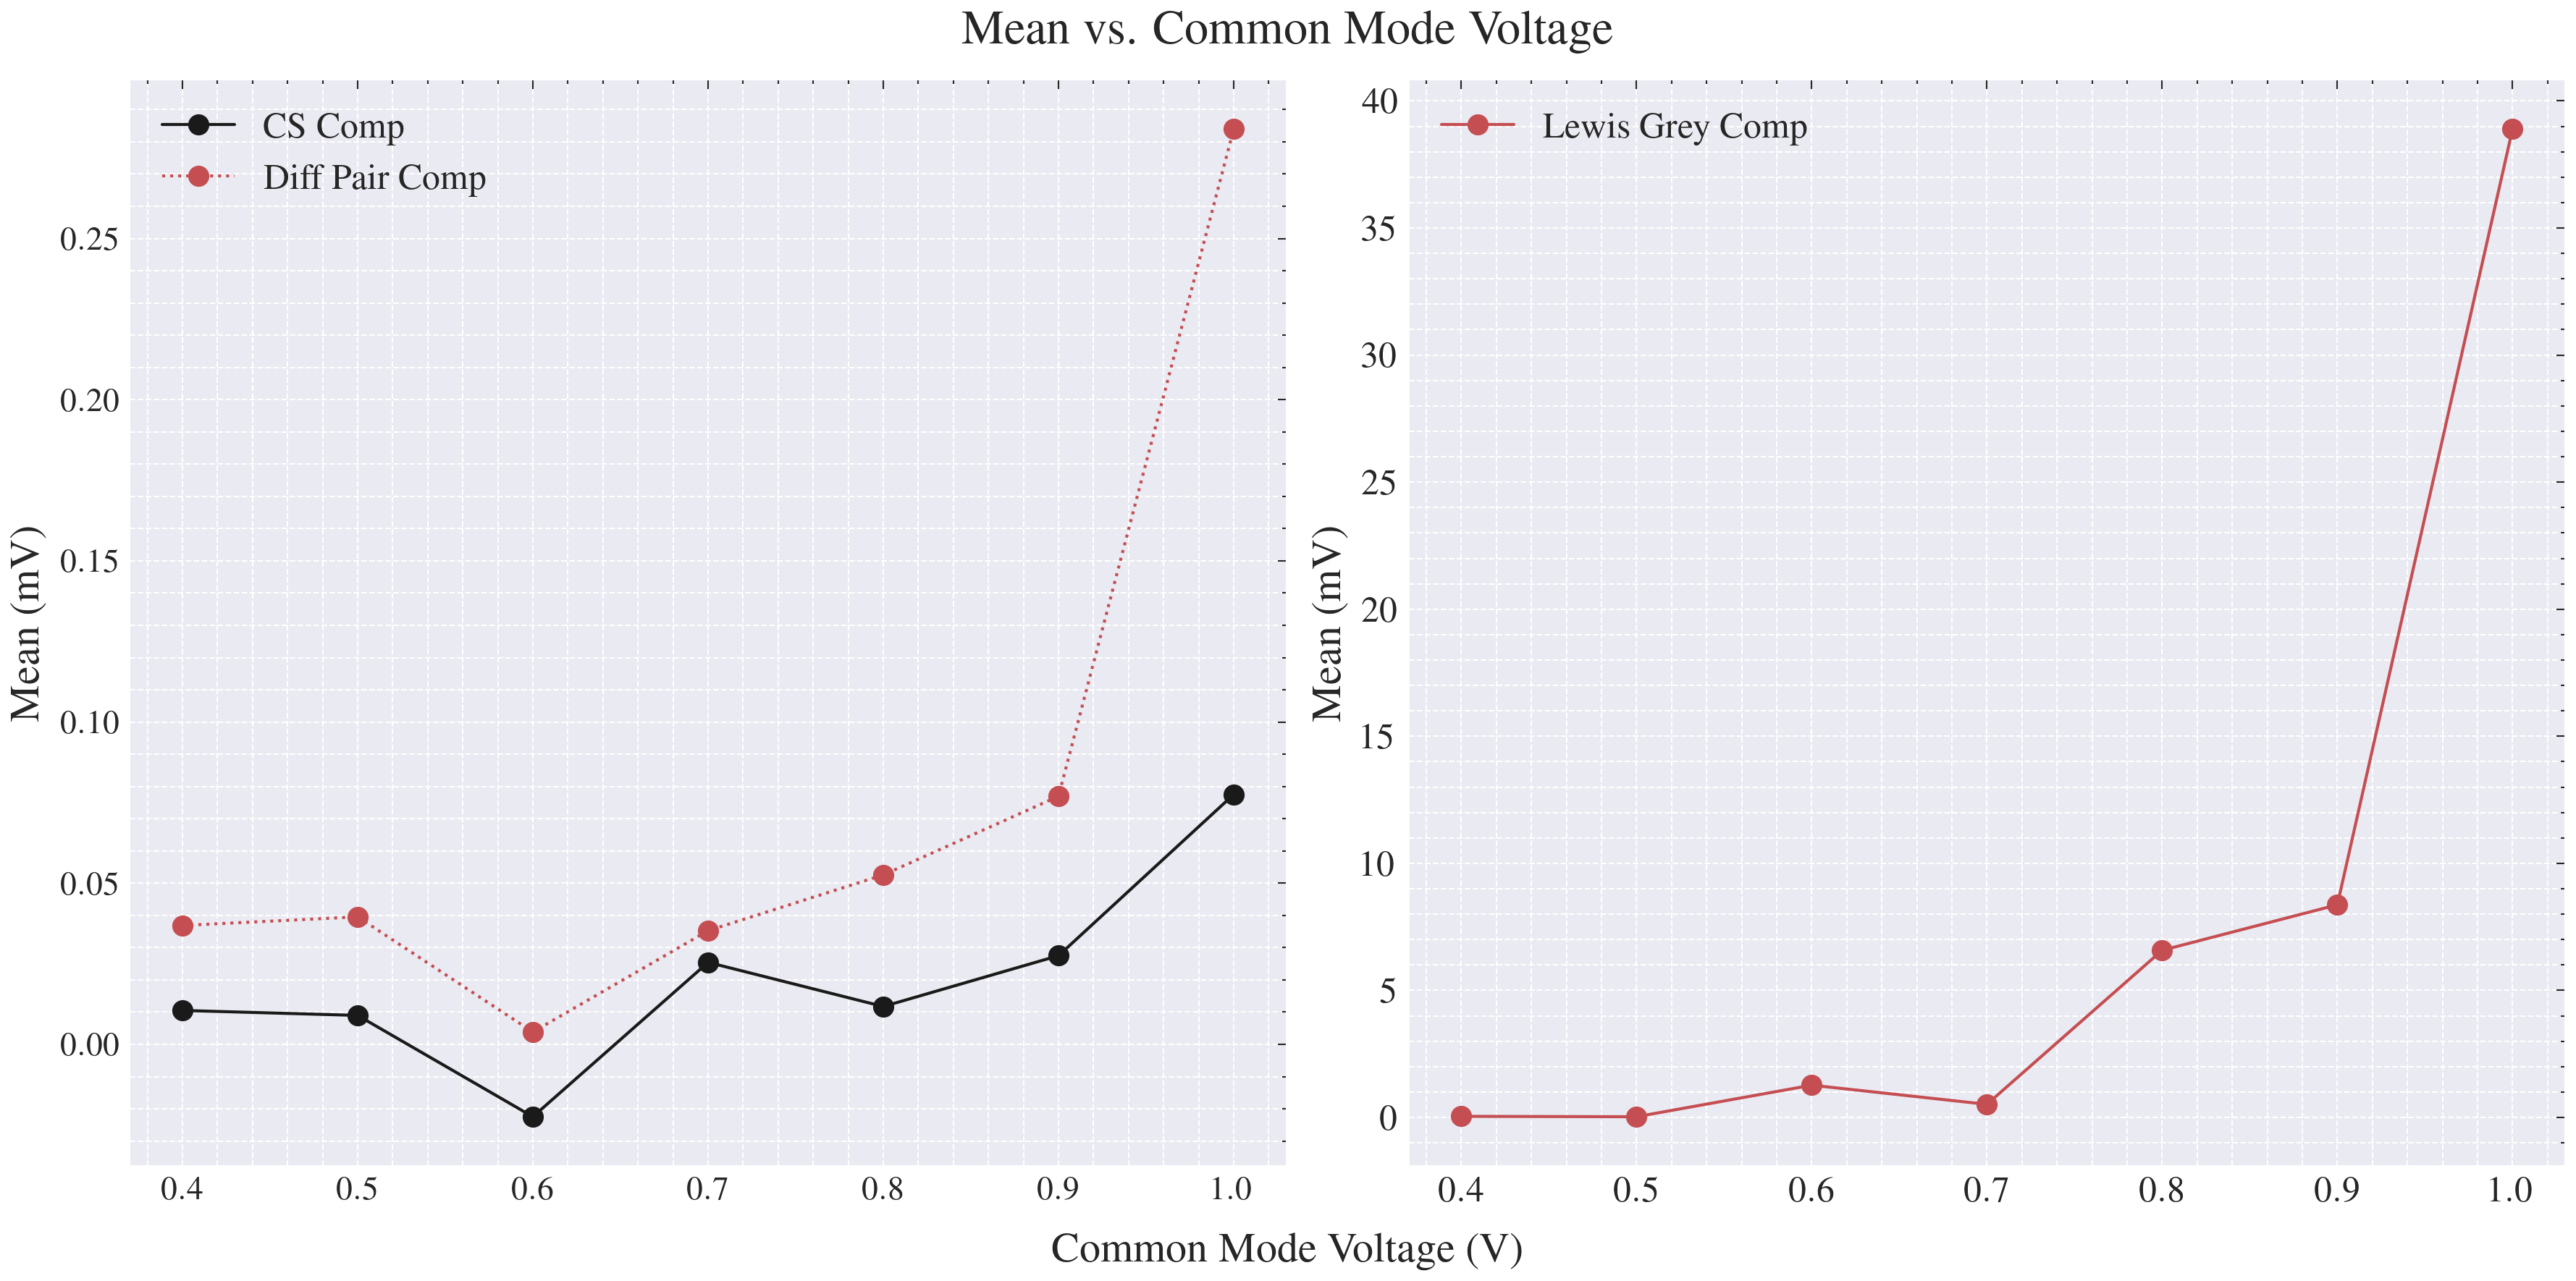

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science', 'ieee'])

# Converting voltage strings to numerical values
def convert_voltage_to_numeric(voltage_str):
    if voltage_str.endswith('V') and not voltage_str.endswith('mV'):
        return float(voltage_str.rstrip('V'))
    elif voltage_str.endswith('mV'):
        return float(voltage_str.rstrip('mV')) / 1000
    else:
        raise ValueError("Unknown voltage unit")

# Original columns array with voltage points as strings
columns = ['1V', '400mV', '500mV', '600mV', '700mV', '800mV', '900mV']
numeric_columns = np.array([convert_voltage_to_numeric(v) for v in columns])

def plot_std_with_lines(CScompdata_std, LewisGreyData_std, AlternaitveLewisData_std, title):
    sorted_indices = np.argsort(numeric_columns)
    sorted_columns = numeric_columns[sorted_indices]

    with plt.style.context(['science', 'ieee']):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, dpi=300)

        ax1.plot(sorted_columns, CScompdata_std.values.flatten()[sorted_indices] * 1000, '-o', label='CS Comp')
        ax1.plot(sorted_columns, AlternaitveLewisData_std.values.flatten()[sorted_indices] * 1000, '-o', linestyle=':', label='Diff Pair Comp')
        ax1.set_ylabel('Standard Deviation (mV)', fontsize=14)
        ax1.legend(fontsize=12)
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax1.minorticks_on()

        ax2.plot(sorted_columns, LewisGreyData_std.values.flatten()[sorted_indices] * 1000, '-o', label='Lewis Grey Comp', color='r')
        ax2.set_ylabel('Standard Deviation (mV)', fontsize=14)
        ax2.legend(fontsize=12)
        ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax2.minorticks_on()

        fig.text(0.5, 0.02, 'Common Mode Voltage (V)', ha='center', fontsize=14)
        plt.suptitle(title, fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout(rect=[0, 0.04, 1, 1])
        plt.savefig('std_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
        plt.show()

def plot_mean_with_lines(CScompdata_mean, LewisGreyData_mean, AlternaitveLewisData_mean, title):
    sorted_indices = np.argsort(numeric_columns)
    sorted_columns = numeric_columns[sorted_indices]

    with plt.style.context(['science', 'ieee']):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, dpi=300)

        ax1.plot(sorted_columns, CScompdata_mean.values.flatten()[sorted_indices] * 1000, '-o', label='CS Comp')
        ax1.plot(sorted_columns, AlternaitveLewisData_mean.values.flatten()[sorted_indices] * 1000, '-o', linestyle=':', label='Diff Pair Comp')
        ax1.set_ylabel('Mean (mV)', fontsize=14)
        ax1.legend(fontsize=12)
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax1.minorticks_on()

        ax2.plot(sorted_columns, LewisGreyData_mean.values.flatten()[sorted_indices] * 1000, '-o', label='Lewis Grey Comp', color='r')
        ax2.set_ylabel('Mean (mV)', fontsize=14)
        ax2.legend(fontsize=12)
        ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax2.minorticks_on()

        fig.text(0.5, 0.02, 'Common Mode Voltage (V)', ha='center', fontsize=14)
        plt.suptitle(title, fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout(rect=[0, 0.04, 1, 1])
        plt.savefig('mean_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
        plt.show()

# Assuming CScompdata_std, LewisGreyData_std, AlternaitveLewisData_std, CScompdata_mean, LewisGreyData_mean, and AlternaitveLewisData_mean are defined
# Plotting standard deviations with lines
plot_std_with_lines(CScompdata_std, LewisGreyData_std, AlternaitveLewisData_std, 'Standard Deviation vs. Common Mode Voltage')

# Plotting means with lines
plot_mean_with_lines(CScompdata_mean, LewisGreyData_mean, AlternaitveLewisData_mean, 'Mean vs. Common Mode Voltage')


Calculated Offset Error: 10.00 counts
Calculated Gain Error: -2.00%


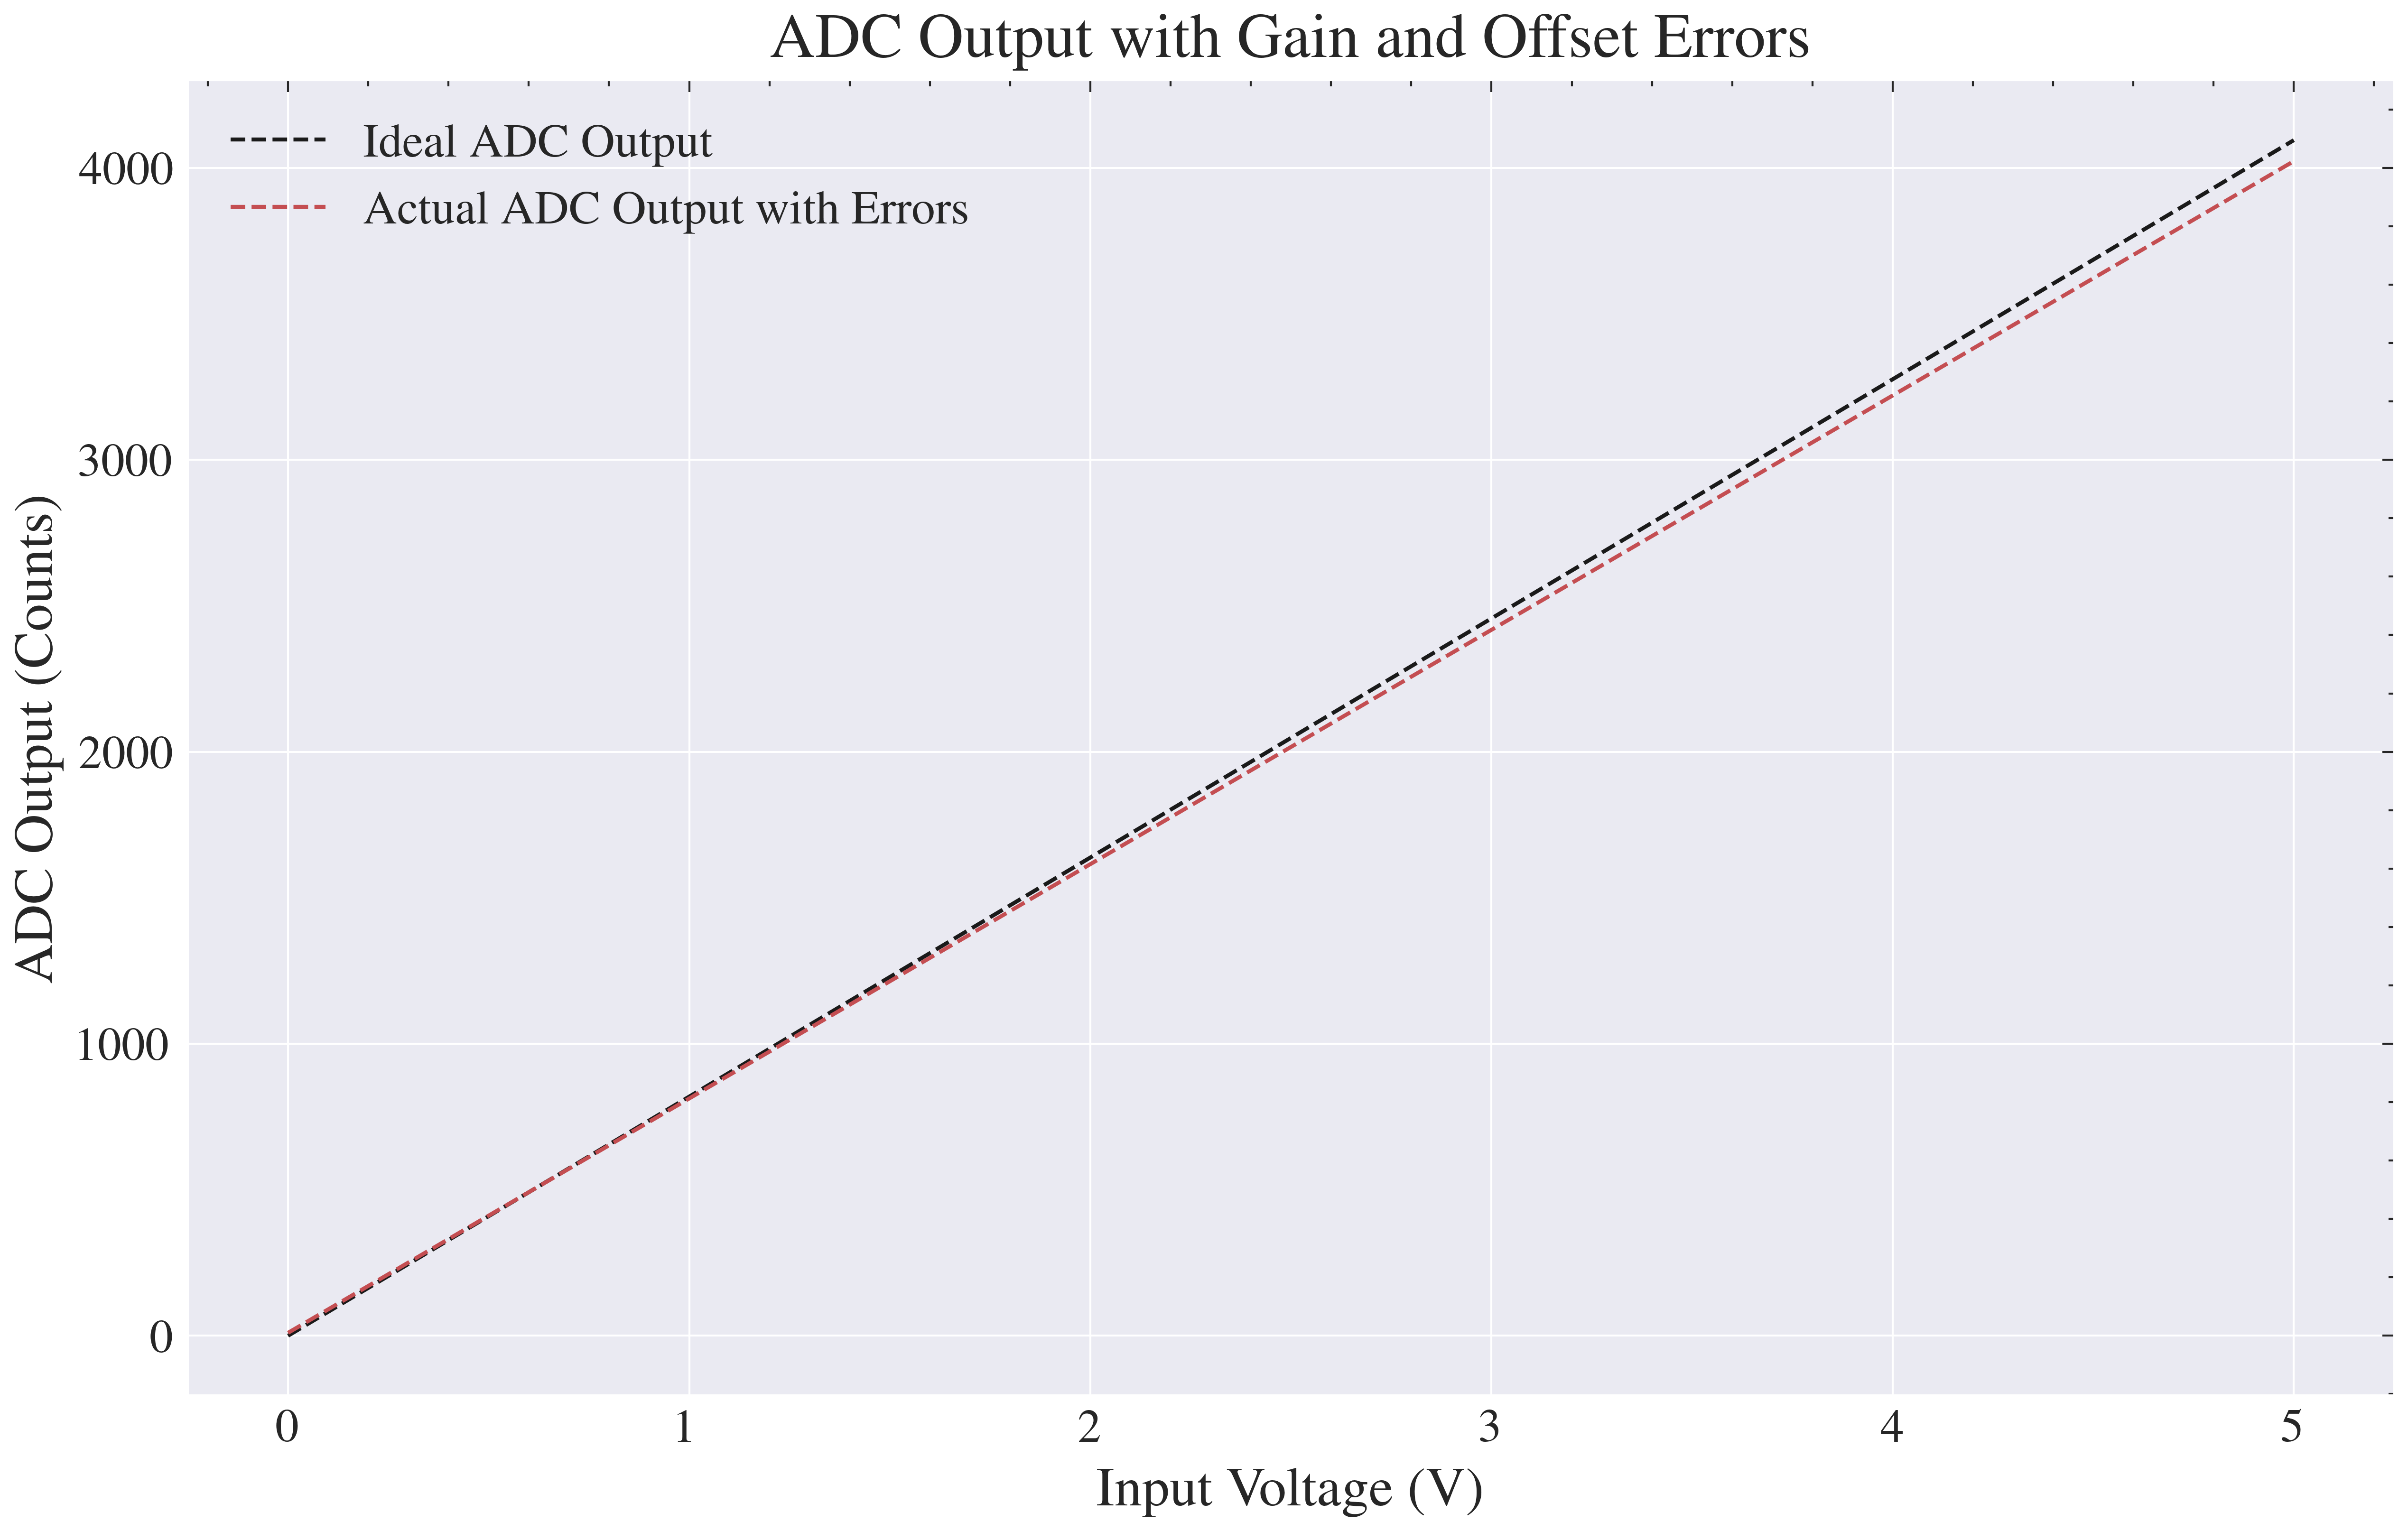

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
input_range = 5.0  # Full-scale input range (0 to 5V)
adc_resolution = 12  # 12-bit ADC
num_points = 1000  # Number of points for simulation

# Generate ideal input curve (linear ramp)
ideal_input = np.linspace(0, input_range, num_points)

# Ideal ADC output (without errors)
ideal_adc_output = np.linspace(0, (2**adc_resolution) - 1, num_points)

# Introduce offset and gain errors
offset_error = 10  # Offset error in ADC counts
gain_error_factor = 0.98  # Gain error factor (0.98 means 2% gain error)

# Simulate actual ADC output with errors
actual_adc_output = gain_error_factor * ideal_adc_output + offset_error

# Calculate offset error (difference at 0V input)
calculated_offset_error = actual_adc_output[0]

# Calculate gain error (slope difference)
ideal_slope = (ideal_adc_output[-1] - ideal_adc_output[0]) / input_range
actual_slope = (actual_adc_output[-1] - actual_adc_output[0]) / input_range
calculated_gain_error = (actual_slope / ideal_slope) - 1

# Print calculated errors
print(f"Calculated Offset Error: {calculated_offset_error:.2f} counts")
print(f"Calculated Gain Error: {calculated_gain_error * 100:.2f}%")

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(ideal_input, ideal_adc_output, label="Ideal ADC Output", linestyle='--')
plt.plot(ideal_input, actual_adc_output, label="Actual ADC Output with Errors")
plt.xlabel("Input Voltage (V)")
plt.ylabel("ADC Output (Counts)")
plt.title("ADC Output with Gain and Offset Errors")
plt.legend()
plt.grid(True)
plt.show()


Calculated Offset Error: -1.20 counts
Calculated Gain Error: -0.10%


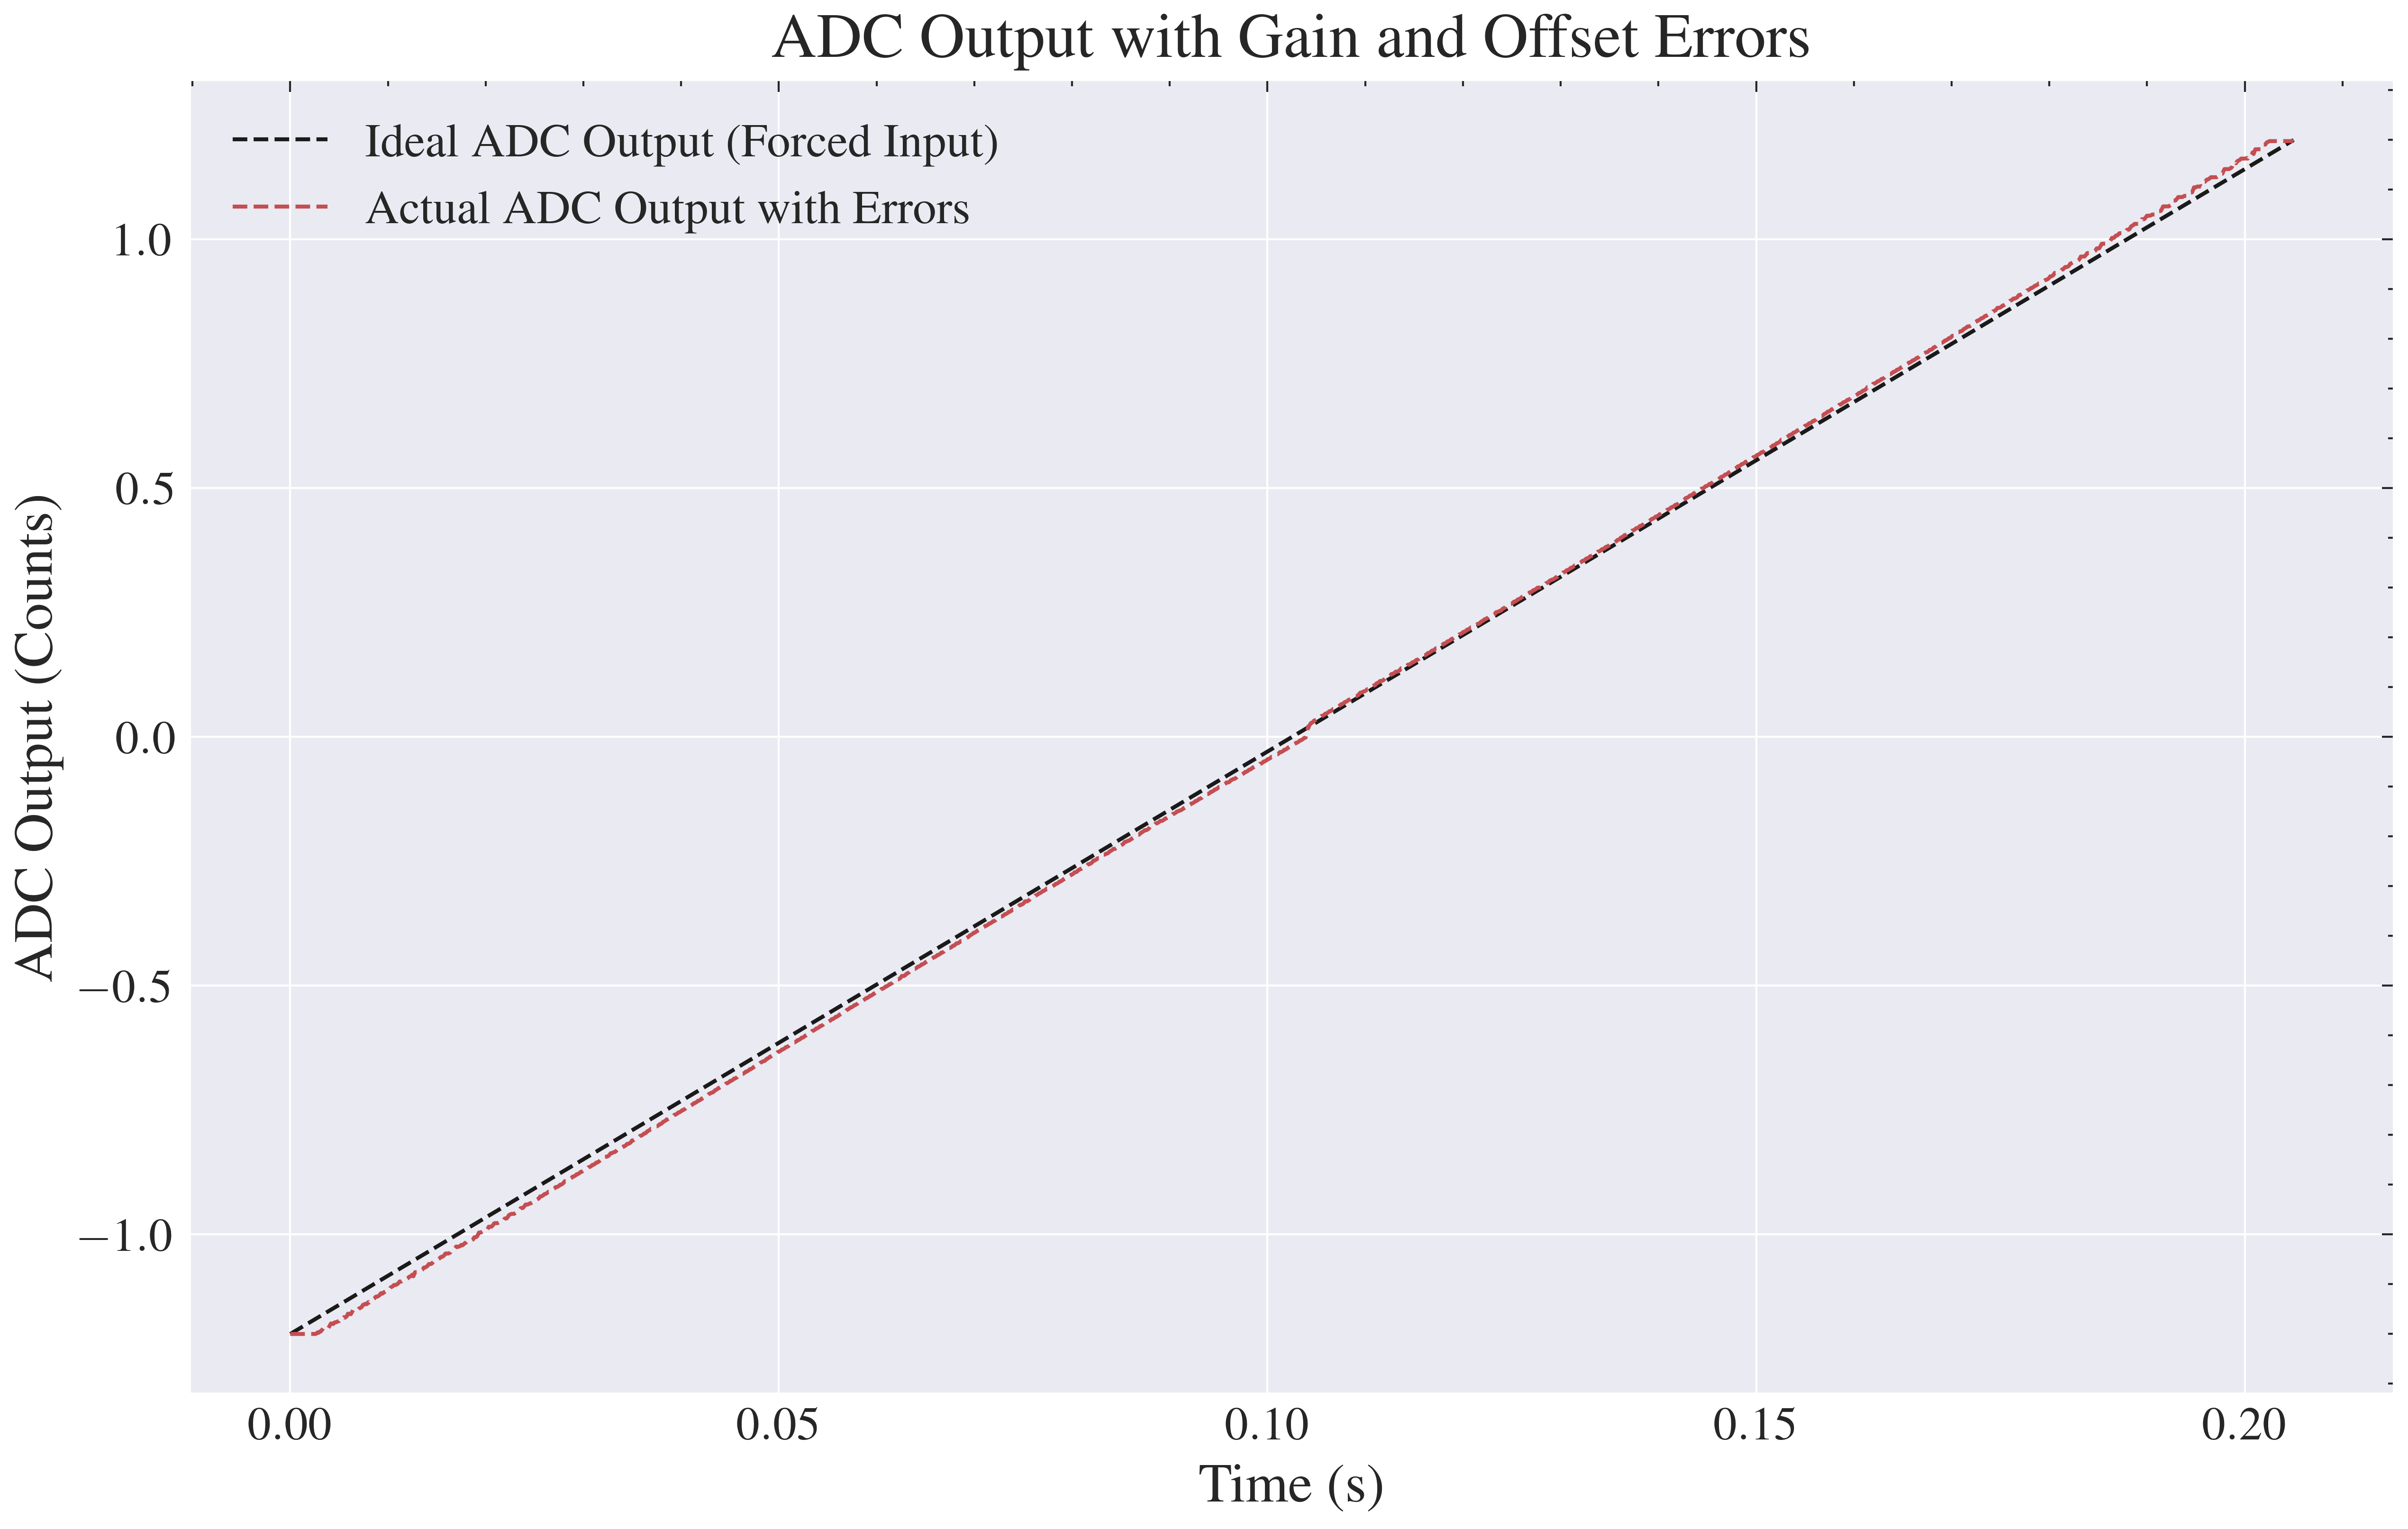

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV files
adc_output_path = 'ADC_output_10bit_1_23042024.csv'
forced_input_path = 'ADC_input_10bit_1_23042024.csv'

# Read the data
adc_output_data = pd.read_csv(adc_output_path)
forced_input_data = pd.read_csv(forced_input_path)

# Assume the CSV files have columns: 'Vinput X' and 'Vinput Y'
adc_output_data.columns = ['Vinput X', 'Vinput Y']
forced_input_data.columns = ['Vinput X', 'Vinput Y']

# Extract the relevant columns
adc_output = adc_output_data['Vinput Y'].values
forced_input = forced_input_data['Vinput Y'].values

# Ideal ADC output is given by the forced input data
ideal_adc_output = forced_input

# Calculate offset error (difference at 0V input)
offset_error = adc_output[0]

# Calculate gain error (slope difference)
input_range = forced_input.max() - forced_input.min()  # Full-scale input range
ideal_slope = (ideal_adc_output[-1] - ideal_adc_output[0]) / input_range
actual_slope = (adc_output[-1] - adc_output[0]) / input_range
gain_error = (actual_slope / ideal_slope) - 1

# Print calculated errors
print(f"Calculated Offset Error: {offset_error:.2f} counts")
print(f"Calculated Gain Error: {gain_error * 100:.2f}%")

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(adc_output_data['Vinput X'], ideal_adc_output, label="Ideal ADC Output (Forced Input)", linestyle='--')
plt.plot(adc_output_data['Vinput X'], adc_output, label="Actual ADC Output with Errors")
plt.xlabel("Time (s)")
plt.ylabel("ADC Output (Counts)")
plt.title("ADC Output with Gain and Offset Errors")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV files
adc_output_path = 'ADC_output_10bit_1_23042024.csv'
forced_input_path = 'ADC_input_10bit_1_23042024.csv'

# Read the data
adc_output_data = pd.read_csv(adc_output_path)
forced_input_data = pd.read_csv(forced_input_path)

# Assume the CSV files have columns: 'Vinput X' and 'Vinput Y'
adc_output_data.columns = ['Vinput X', 'Vinput Y']
forced_input_data.columns = ['Vinput X', 'Vinput Y']

# Extract the relevant columns
adc_output = adc_output_data['Vinput Y'].values
forced_input = forced_input_data['Vinput Y'].values

last_index = adc_output_data[adc_output_data['Vinput Y'] == -1.2].index[-1]
numericaloffset=(ideal_adc_output[last_index])-(adc_output[last_index])

#For finding the full scale error in mV the index of the highest value in the adc_output is found
#and the difference between the ideal_adc_output and the adc_output is calculated

last_index_fullscale = adc_output_data['Vinput Y'].idxmax()
last_index_forcedinput = forced_input_data['Vinput Y'].idxmax()

fullscaleerror = (adc_output[last_index_fullscale])-(ideal_adc_output[last_index_fullscale])



if adc_output[last_index] < ideal_adc_output[last_index]:
    numericaloffset = numericaloffset * -1
    offsetvoltagemili = numericaloffset*1000
elif adc_output[last_index] > ideal_adc_output[last_index]:
    numericaloffset = numericaloffset
    offsetvoltagemili = numericaloffset*1000

#calculating the offseterror in LSB
LSB = 2.4/1024
offseterrorLSB = numericaloffset/LSB

print(f"Numerical Offset Error: {offsetvoltagemili:.2f} mV")
print(f"Offset Error in LSB: {offseterrorLSB:.2f} LSB")

print(f"Full Scale Error: {fullscaleerror:.2f} mV")

## Plotting the curves
#plt.figure(figsize=(10, 6))
#plt.plot(adc_output_data['Vinput X'], ideal_adc_output, label="Ideal ADC Output (Forced Input)", linestyle='--')
#plt.plot(adc_output_data['Vinput X'], adc_output, label="Actual ADC Output with Errors")
#plt.xlabel("Time (s)")
#plt.ylabel("(V)")
#plt.title("ADC Output with Gain and Offset Errors")
#plt.legend()
#plt.grid(True)
#plt.show()
#
##creatingsubplot with the adc_output shifted by the offseterror
#plt.figure(figsize=(10, 6))
#plt.plot(adc_output_data['Vinput X'], ideal_adc_output, label="Ideal ADC Output (Forced Input)", linestyle='--')
#plt.plot(adc_output_data['Vinput X'], adc_output+np.abs(numericaloffset), label="Actual ADC Output with Errors and Offset Correction")
#plt.xlabel("Time (s)")
#plt.ylabel("(V)")
#plt.title("ADC Output with Gain and Offset Errors")
#plt.legend()
#plt.grid(True)
#plt.show()


Numerical Offset Error: -30.41 mV
Offset Error in LSB: -12.97 LSB
Full Scale Error: 0.03 mV
